# Ordered / Orginal Logistic Regression
## Used when the dependent variable is ordinal

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_stata("ologit_data.dta")
df

,apply,pared,public,gpa
0,very likely,0,0,3.26
1,somewhat likely,1,0,3.21
2,unlikely,1,1,3.94
3,somewhat likely,0,0,2.81
4,somewhat likely,0,0,2.53
...,...,...,...,...
395,unlikely,0,0,3.70
396,unlikely,0,0,2.63
397,somewhat likely,0,0,2.25
398,somewhat likely,0,0,3.26


In [6]:
d = {'very likely':3,'somewhat likely':2,'unlikely':1}
df['apply2'] = df['apply'].map(d)
df

,apply,pared,public,gpa,apply2
0,very likely,0,0,3.26,3
1,somewhat likely,1,0,3.21,2
2,unlikely,1,1,3.94,1
3,somewhat likely,0,0,2.81,2
4,somewhat likely,0,0,2.53,2
...,...,...,...,...,...
395,unlikely,0,0,3.70,1
396,unlikely,0,0,2.63,1
397,somewhat likely,0,0,2.25,2
398,somewhat likely,0,0,3.26,2


In [7]:
X = df[['pared', 'public','gpa']]
y = df['apply2']
#X = sm.add_constant(X) NO CONSTANT IS REQUIRED AS IT IS AUTOMATICALLY HANDLED

model = OrderedModel(y, X, distr='logit')
result = model.fit(method='bfgs')  #bfgs is an optimization method

result.summary()

Optimization terminated successfully.
         Current function value: 0.896281
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                 apply2   Log-Likelihood:                -358.51
Model:                   OrderedModel   AIC:                             727.0
Method:            Maximum Likelihood   BIC:                             747.0
Date:                Wed, 10 Apr 2024                                         
Time:                        20:31:43                                         
No. Observations:                 400                                         
Df Residuals:                     395                                         
Df Model:                           3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pared          1.0476      0.266      3.942      0.000       0.527       1.569
public        -0.0586      0.298     -0.197      0.844      -0.642       0.525
gpa            0.6158      0.261      2.363      0.018       0.105       1.127
1/2            2.2035      0.780      2.827      0.005       0.676       3.731
2/3            0.7398      0.080      9.236      0.000       0.583       0.897
==============================================================================
"""

In [8]:
predicted_probs = result.predict(X)
predicted_probs

,0,1,2
0,0.548841,0.359323,0.091837
1,0.305582,0.475942,0.218476
2,0.229384,0.478191,0.292426
3,0.616118,0.312690,0.071191
4,0.656003,0.283398,0.060599
...,...,...,...
395,0.481266,0.401662,0.117072
396,0.641976,0.293823,0.064201
397,0.693804,0.254701,0.051496
398,0.548841,0.359323,0.091837


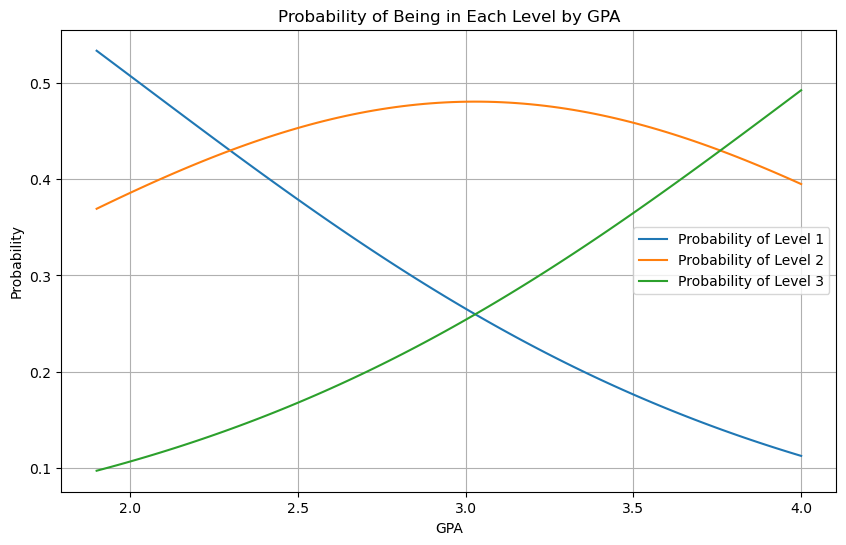

In [9]:
gpa_span = np.linspace(df['gpa'].min(), df['gpa'].max(), 100)

prediction_frame = pd.DataFrame({
    'gpa': gpa_span,
    'pared': np.mean(df['pared']),  
    'public': np.mean(df['public'])
})

probabilities = result.predict(prediction_frame)

plt.figure(figsize=(10, 6))
for i in range(probabilities.shape[1]):
    plt.plot(gpa_span, probabilities.iloc[:, i], label=f'Probability of Level {i+1}')

plt.xlabel('GPA')
plt.ylabel('Probability')
plt.title('Probability of Being in Each Level by GPA')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
df = pd.read_csv('affairs.csv')
df.columns

Index(['affair_count', 'is_male', 'age', 'years_married', 'have_kids',
       'religiousness_1to5', 'years_of_education',
       'hollingshead_occupation_code', 'marriage_rating_1to5'],
      dtype='object')

In [29]:
y = df['religiousness_1to5']
X = df[['is_male','age','years_married','have_kids','years_of_education']]
#X = sm.add_constant(X)

In [37]:
model = OrderedModel(y, X, distr='logit')
result = model.fit(method='bfgs')  #bfgs is an optimization method
result.summary()

Optimization terminated successfully.
         Current function value: 1.473035
         Iterations: 29
         Function evaluations: 33
         Gradient evaluations: 33


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:     religiousness_1to5   Log-Likelihood:                -885.29
Model:                   OrderedModel   AIC:                             1789.
Method:            Maximum Likelihood   BIC:                             1828.
Date:                Wed, 10 Apr 2024                                         
Time:                        20:37:14                                         
No. Observations:                 601                                         
Df Residuals:                     592                                         
Df Model:                           5                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
is_male                0.0519      0.164      0.316      0.752      -0.270       0.373
age                    0.0159      0.014      1.167      0.243      -0.011       0.043
years_married          0.0522      0.024      2.188      0.029       0.005       0.099
have_kids              0.0405      0.196      0.207      0.836      -0.343       0.424
years_of_education    -0.0474      0.033     -1.424      0.154      -0.113       0.018
1/2                   -2.2935      0.612     -3.750      0.000      -3.492      -1.095
2/3                    0.6316      0.076      8.331      0.000       0.483       0.780
3/4                   -0.0844      0.081     -1.045      0.296      -0.243       0.074
4/5                    0.5991      0.068      8.844      0.000       0.466       0.732
======================================================================================
"""